In [39]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from math import factorial

def comb(n, k):
    return factorial(n) / factorial(k) / factorial(n - k)

In [3]:
def hits(diepool):
    pdf = []
    prob = 0.0
    for i in range(diepool + 1):
        prob = comb(diepool, i) * (1.0/3.0)**i * (2.0/3.0)**(diepool - i)
        pdf.append(prob)
    return pdf

def get(l, n):
    if n < 0:
        return 0.0
    if n >= len(l):
        return 0.0
    return l[n]


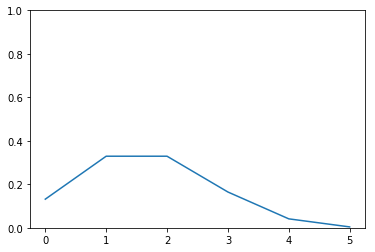

In [10]:
plt.ylim(0, 1)
plt.plot(hits(5))


In [11]:
def prob_hits(attack, defence):
    attack_pdf = hits(attack)
    defence_pdf = hits(defence)
    net_hits_pdf = {}
    for net_hits in range(-defence, attack+1):
        prob = 0.0
        for attack_hits in range(0, attack):
            defence_hits = attack_hits - net_hits
            prob += get(attack_pdf, attack_hits) * get(defence_pdf, defence_hits)
        net_hits_pdf[net_hits] = prob
    return net_hits_pdf
            
        
        

In [49]:


def damage_for_attack(attack_pool, dodge_pool, base_DV, armor, body):
    attack_pool = max(0, attack_pool)
    dodge_pool = max(0, dodge_pool)
    expected_soak = (armor + body) / 3
    p_hits = prob_hits(attack_pool, dodge_pool)
    r = range(-dodge_pool, attack_pool+1)
    # plt.plot(r, [p_hits[i] for i in r])
    p_miss = sum(p_hits[i] for i in range(-dodge_pool, 1))
    # print("p_miss ", p_miss)
    expected_DV = sum(((base_DV + i - expected_soak)*p_hits[i] for i in range(1,attack_pool)))
    # print("expected_DV", expected_DV)
    return expected_DV



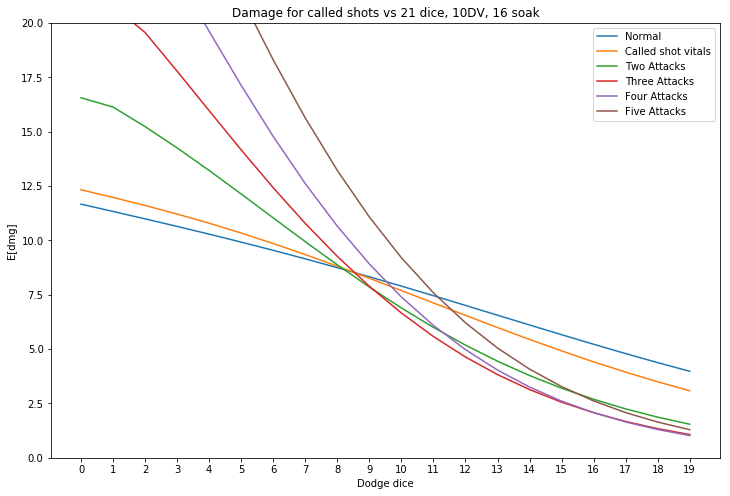

In [50]:
base_DV = 10
armor = 12
body = 4
params = {'base_DV':base_DV, 'armor': armor, 'body':body}
damage_for_different_dodge_values = [
    damage_for_attack(21, dodge_pool, **params)
    for dodge_pool in range(20)
]
called_shot = [
    damage_for_attack(21 - 4, dodge_pool, base_DV=(base_DV + 2), armor=armor, body=body)
    for dodge_pool in range(20)
]
two_knives = [
        damage_for_attack(11, dodge_pool, **params)
    +   damage_for_attack(11, dodge_pool - 1, **params)
    for dodge_pool in range(20)
]
three_knives = [
        damage_for_attack(7, dodge_pool, **params)
    +   damage_for_attack(7+1, dodge_pool - 1, **params)
    +   damage_for_attack(7+2, dodge_pool - 2, **params)

    for dodge_pool in range(20)
]
four_knives = [
        damage_for_attack(6, dodge_pool, **params)
    +   damage_for_attack(5+1, dodge_pool - 1, **params)
    +   damage_for_attack(5+2, dodge_pool - 2, **params)
    +   damage_for_attack(5+3, dodge_pool - 3, **params)
    for dodge_pool in range(20)
]
five_knives = [
        damage_for_attack(5, dodge_pool, **params)
    +   damage_for_attack(4+1, dodge_pool - 1, **params)
    +   damage_for_attack(4+2, dodge_pool - 2, **params)
    +   damage_for_attack(4+3, dodge_pool - 3, **params)
    +   damage_for_attack(4+4, dodge_pool - 4, **params)

    for dodge_pool in range(20)
]
plt.ylim(0, 20)
plt.xticks(range(20))
plt.title("Damage for called shots vs 21 dice, 10DV, 16 soak")
plt.xlabel("Dodge dice")
plt.ylabel("E[dmg]")
plt.plot(damage_for_different_dodge_values, label="Normal")
plt.plot(called_shot, label="Called shot vitals")
plt.plot(two_knives, label="Two Attacks")
plt.plot(three_knives, label="Three Attacks")
plt.plot(four_knives, label="Four Attacks")
plt.plot(five_knives, label="Five Attacks")



plt.legend()


In [42]:
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]


In [8]:
dodge_pool = 7
attack_pool = 17
base_DV = 12

p_hits = prob_hits(attack_pool, dodge_pool)
r = range(-dodge_pool, attack_pool+1)
plt.plot(r, [p_hits[i] for i in r])
p_miss = sum(p_hits[i] for i in range(-dodge_pool, 1))
print("p_miss ", p_miss)
expected_DV = sum(((base_DV + i - expected_soak)*p_hits[i] for i in range(1,attack_pool)))
print("expected_DV", expected_DV)


p_miss  0.10806296297573381
expected_DV 9.345518843053307
